### Лабораторная работа №1 (Леденцы)
#### Иерархический метод анализа и кластеризации данных

Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

plt.style.use('ggplot')

1. Загрузка данных
* Файл data.dat должен содержать столбцы V1...V11, разделённые ';'.

In [2]:
df = pd.read_csv('data.dat', sep=';', decimal=',')

print("Первые строки данных:")
print(df.head(), '\n')

print("Информация о данных:")
print(df.info(), '\n')

Первые строки данных:
   V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11
0   4   5   5   5   3   3   3   3   3    3    3
1   5   4   5   5   3   3   3   3   3    3    3
2   5   5   4   5   3   3   3   3   3    3    3
3   5   4   5   5   3   3   3   3   3    3    3
4   4   5   5   5   3   3   3   3   3    3    3 

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      338 non-null    int64
 1   V2      338 non-null    int64
 2   V3      338 non-null    int64
 3   V4      338 non-null    int64
 4   V5      338 non-null    int64
 5   V6      338 non-null    int64
 6   V7      338 non-null    int64
 7   V8      338 non-null    int64
 8   V9      338 non-null    int64
 9   V10     338 non-null    int64
 10  V11     338 non-null    int64
dtypes: int64(11)
memory usage: 29.2 KB
None 



2. Нормализация данных
* Так как все ответы — числовые оценки (от 1 до 5), необходимо нормализовать данные, чтобы каждая переменная вносила равный вклад в анализ.

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, columns=df.columns)

print("Нормализованные данные:")
print(X_scaled.head(), '\n')


Нормализованные данные:
         V1        V2        V3        V4        V5        V6        V7  \
0  0.477424  1.542809  1.499214  1.603442 -0.239138 -0.235068 -0.301875   
1  1.525275  0.495682  1.499214  1.603442 -0.239138 -0.235068 -0.301875   
2  1.525275  1.542809  0.487768  1.603442 -0.239138 -0.235068 -0.301875   
3  1.525275  0.495682  1.499214  1.603442 -0.239138 -0.235068 -0.301875   
4  0.477424  1.542809  1.499214  1.603442 -0.239138 -0.235068 -0.301875   

         V8        V9       V10       V11  
0 -0.353342 -0.623343 -0.594459 -0.600745  
1 -0.353342 -0.623343 -0.594459 -0.600745  
2 -0.353342 -0.623343 -0.594459 -0.600745  
3 -0.353342 -0.623343 -0.594459 -0.600745  
4 -0.353342 -0.623343 -0.594459 -0.600745   



3. Иерархическая кластеризация 
* Используем `linkage` c методом Ward и евклидовой метрикой для создания компактных и сбалансированных кластеров.

In [4]:
link = linkage(X_scaled, method='ward', metric='euclidean')
print(f"Размерность матрицы linkage: {link.shape}\n")

Размерность матрицы linkage: (337, 4)



4. Определение порога для разреза дендрограммы 

In [5]:
cut_height = 0.7 * np.max(link[:, 2])
print(f"Порог разреза: {cut_height:.2f}\n")

Порог разреза: 38.57



5. Построение дендрограммы

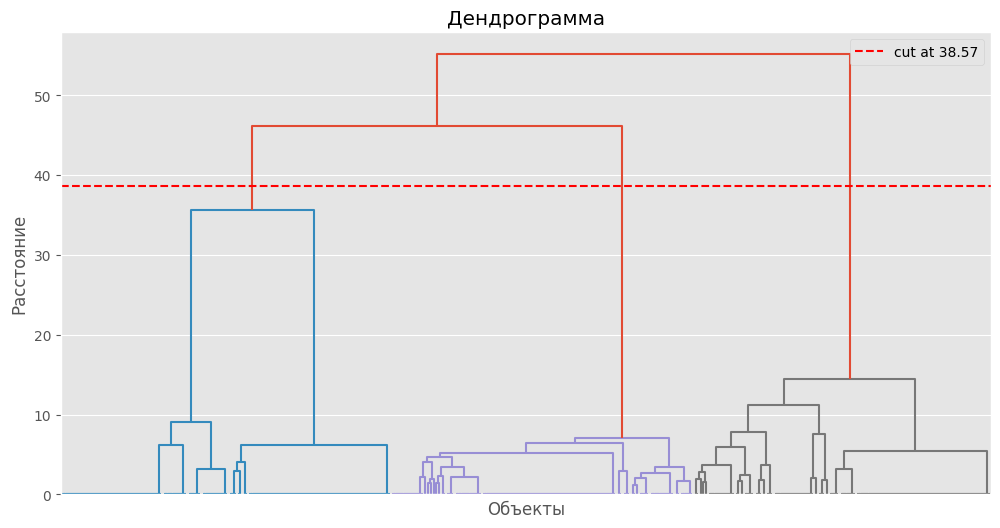

In [6]:
plt.figure(figsize=(12, 6))
dendrogram(link,
           no_labels=True,
           distance_sort='descending',
           show_leaf_counts=False)
plt.axhline(y=cut_height, color='red', linestyle='--', label=f'cut at {cut_height:.2f}')
plt.title("Дендрограмма")
plt.xlabel("Объекты")
plt.ylabel("Расстояние")
plt.legend()
plt.show()


Исходя из формы дендрограммы, можно выделить примерно три чётко различающихся кластера.

6. Построим график "каменистой осыпи" для дополнительного анализа
* Выведем последние 15 шагов объединения для более крупного масштаба и наглядности графика.

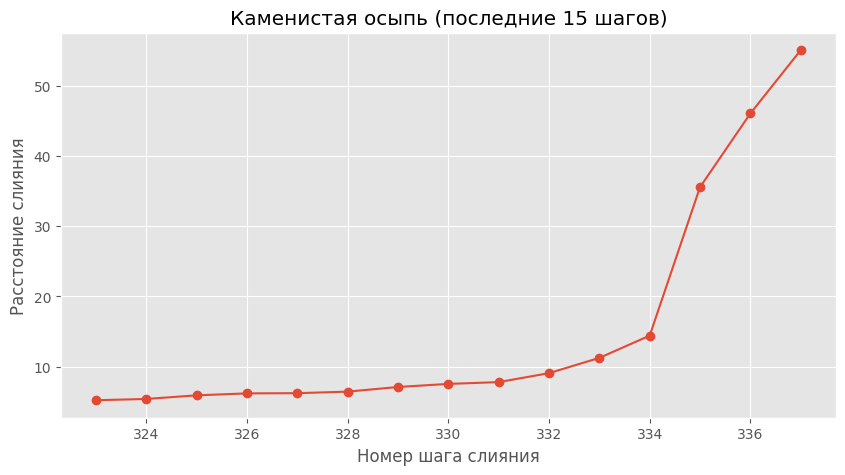

In [7]:
distances = link[:, 2]
steps = np.arange(1, len(distances) + 1)
N_last = 15  # последние шаги объединений для наглядности

plt.figure(figsize=(10, 5))
plt.plot(steps[-N_last:], distances[-N_last:], marker='o', linestyle='-')
plt.title(f'Каменистая осыпь (последние {N_last} шагов)')
plt.xlabel('Номер шага слияния')
plt.ylabel('Расстояние слияния')
plt.grid(True)
plt.show()

Можно заметить, что излом (локоть) графика проявляется на шаге слияния 334. На основании этого делаем вывод, что оптимальное число кластеров составляет примерно 3.

7. Определение количества кластеров и разбиение 
* По дендрограмме и осыпи видно — примерно 3 кластера.

In [8]:
num_clusters = 3

clusters = fcluster(link, num_clusters, criterion='maxclust')
df['cluster'] = clusters

print("Размеры кластеров:")
print(df['cluster'].value_counts(), '\n')


Размеры кластеров:
cluster
3    120
2    110
1    108
Name: count, dtype: int64 



8. Средние значения по кластерам 

In [9]:
cluster_means = df.groupby('cluster').mean()
print("Средние значения признаков в кластерах:")
print(cluster_means, '\n')

Средние значения признаков в кластерах:
               V1        V2        V3        V4        V5        V6        V7  \
cluster                                                                         
1        2.824074  2.833333  2.768519  2.620370  2.611111  2.583333  2.750000   
2        4.845455  4.800000  4.836364  4.681818  3.036364  3.036364  3.000000   
3        3.000000  2.983333  2.983333  2.958333  3.900000  3.916667  3.941667   

               V8        V9       V10       V11  
cluster                                          
1        2.916667  4.953704  4.814815  4.861111  
2        2.990909  3.072727  3.045455  3.045455  
3        3.900000  2.875000  2.875000  2.875000   



9. Интерпретация кластеров

Интерпретация по средним значениям:
Сравниваем, какие признаки в каждом кластере выше других.

**Кластер 1 — Оздоровительные потребители**
- **Ключевые признаки**: V9–V11
- **Портрет**: Потребляют леденцы для облегчения боли в горле и улучшения общего самочувствия

**Кластер 2 — Функциональные потребители**  
- **Ключевые признаки**: V1–V4
- **Портрет**: Ориентированы на освежение дыхания, уверенность в себе и гигиену полости рта

**Кластер 3 — Эмоциональные потребители**
- **Ключевые признаки**: V5–V8
- **Портрет**: Используют леденцы для получения удовольствия, расслабления и улучшения концентрации


### Вывод

С помощью иерархического метода кластеризации можно наглядно определить примерное количество кластеров и выполнить их содержательную интерпретацию.